# **Computational Drug Discovery [Part 2] Exploratory Data Analysis**

Alberto Moa

---

In this notebook, I will be performing Descriptor Calculation using Lipinski Descriptor and Exploratory Data Analysis.

## 1. Initialization

### 1.1 Install and Import Libaries 

Install conda and rdkit.

In [1]:
! conda install -c rdkit rdkit -y

Retrieving notices: ...working... 

done
Channels:
 - rdkit
 - defaults
 - conda-forge
Platform: osx-arm64
Solving environment: done

# All requested packages already installed.



Import necessary libraries:
- pandas
- numpy
- rdkit

In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski
print('Import Success')

Import Success


### 1.2 Load Bioactivity Data

Load bioactivity data and save it to `df` variable.

In [3]:
# load dataset
df = pd.read_csv('bioactivity_preprocessed_data.csv')

In [4]:
# show sample data
df

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate
...,...,...,...,...
128,CHEMBL2146517,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,10600.0,inactive
129,CHEMBL187460,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,10100.0,inactive
130,CHEMBL363535,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,11500.0,inactive
131,CHEMBL227075,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,10700.0,inactive


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


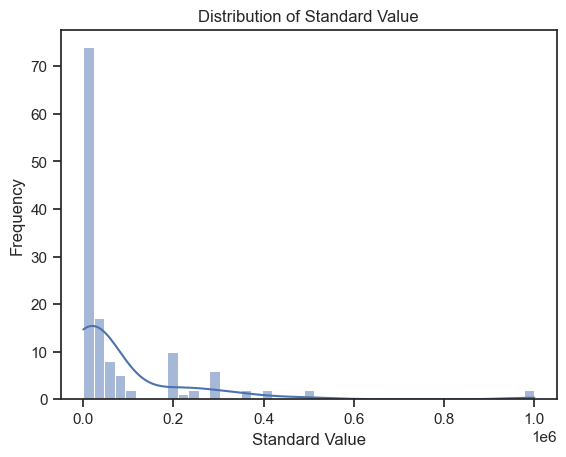

In [5]:
# Example: Plotting the distribution of 'standard_value'
sns.histplot(data=df, x="standard_value", kde=True)
plt.title('Distribution of Standard Value')
plt.xlabel('Standard Value')
plt.ylabel('Frequency')
plt.show()

## 2. Data Pre-Processing

### 2.1 Calculate Lipinski Descriptors
Christopher Lipinski, a scientist at Pfizer, came up with a set of rule-of-thumb for evaluating the **druglikeness** of compounds. Such druglikeness is based on the Absorption, Distribution, Metabolism and Excretion (ADME) that is also known as the pharmacokinetic profile. Lipinski analyzed all orally active FDA-approved drugs in the formulation of what is to be known as the **Rule-of-Five** or **Lipinski's Rule**.

The Lipinski's Rule stated the following:
* Molecular weight < 500 Dalton
* Octanol-water partition coefficient (LogP) < 5
* Hydrogen bond donors < 5
* Hydrogen bond acceptors < 10

#### Calculate Descriptor

In [6]:
# define lipinki function to calculate the descriptors
def lipinski(smiles_list):
    """
    Calculate Lipinski descriptors for a list of SMILES strings.
    
    Parameters:
    smiles_list (list of str): List containing SMILES strings of the compounds.
    
    Returns:
    pd.DataFrame: DataFrame containing Lipinski descriptors for each SMILES string.
    """
    # Initialize lists to store descriptor values
    mw_list = []
    logp_list = []
    hbd_list = []
    hba_list = []

    # Process each SMILES string
    for smiles in smiles_list:
        mol = Chem.MolFromSmiles(smiles)
        
        if mol:  # Check if the molecule was successfully created
            # Calculate descriptors
            mw_list.append(Descriptors.MolWt(mol))
            logp_list.append(Descriptors.MolLogP(mol))
            hbd_list.append(Lipinski.NumHDonors(mol))
            hba_list.append(Lipinski.NumHAcceptors(mol))
        else:
            # Handle invalid SMILES by appending NaN
            mw_list.append(np.nan)
            logp_list.append(np.nan)
            hbd_list.append(np.nan)
            hba_list.append(np.nan)

    # Create DataFrame with calculated descriptors
    descriptors_df = pd.DataFrame({
        "canonical_smiles": smiles_list,
        "mw": mw_list,
        "logP": logp_list,
        "numHdonors": hbd_list,
        "numHacceptors": hba_list
    })
    
    return descriptors_df

In [7]:
# calculate lipinski descriptor
df_lipinski = lipinski(df.canonical_smiles)

In [8]:
# show sample of df_lipinski dataset
df_lipinski

,canonical_smiles,mw,logP,numHdonors,numHacceptors
0,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,281.271,1.89262,0,5
1,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,415.589,3.81320,0,2
2,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,421.190,2.66050,0,4
3,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,293.347,3.63080,0,3
4,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],338.344,3.53900,0,5
...,...,...,...,...,...
128,COC(=O)[C@@]1(C)CCCc2c1ccc1c2C(=O)C(=O)c2c(C)c...,338.359,3.40102,0,5
129,C[C@H]1COC2=C1C(=O)C(=O)c1c2ccc2c1CCCC2(C)C,296.366,3.44330,0,3
130,Cc1coc2c1C(=O)C(=O)c1c-2ccc2c(C)cccc12,276.291,4.09564,0,3
131,Cc1cccc2c3c(ccc12)C1=C(C(=O)C3=O)[C@@H](C)CO1,278.307,3.29102,0,3


#### Combine Dataset

In [9]:
# Merge with bioactivity DataFrame on SMILES
df_combined = pd.merge(df, df_lipinski, on="canonical_smiles")

# Display the combined DataFrame
df_combined.head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,mw,logP,numHdonors,numHacceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,intermediate,281.271,1.89262,0,5
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,intermediate,415.589,3.81320,0,2
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,inactive,421.190,2.66050,0,4
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,inactive,293.347,3.63080,0,3
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,intermediate,338.344,3.53900,0,5


### 2.2 Convert IC50 to pIC50

To allow **IC50** data to be more uniformly distributed, we will convert **IC50** to the negative logarithmic scale which is essentially **-log10(IC50)**.

This custom function pIC50() will accept a DataFrame as input and will:
* Take the IC50 values from the ``standard_value`` column and converts it from nM to M by multiplying the value by 10$^{-9}$
* Take the molar value and apply -log10
* Delete the ``standard_value`` column and create a new ``pIC50`` column

In [10]:
def pIC50(input_df):
    """
    Convert IC50 values in the 'standard_value' column to pIC50.
    
    Parameters:
    input_df (DataFrame): DataFrame containing a 'standard_value' column with IC50 values.
    
    Returns:
    DataFrame: Updated DataFrame with the 'pIC50' column.
    """
    # Convert IC50 from nM to M and then calculate pIC50
    input_df['pIC50'] = -np.log10(input_df['standard_value'] * 1e-9)
    
    # Drop the original 'standard_value' column
    input_df.drop(columns=['standard_value'], inplace=True)
    
    return input_df

In [11]:
# Apply the pIC50 conversion
df_norm = pIC50(df_combined)

# Display the updated DataFrame
df_norm

,molecule_chembl_id,canonical_smiles,bioactivity_class,mw,logP,numHdonors,numHacceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,intermediate,281.271,1.89262,0,5,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,intermediate,415.589,3.81320,0,2,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.66050,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.63080,0,3,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],intermediate,338.344,3.53900,0,5,5.698970
...,...,...,...,...,...,...,...,...
256,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.10530,0,2,4.220404
257,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.10530,0,2,4.102923
258,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.10530,0,2,4.102923
259,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.10530,0,2,4.102923


### 2.3 Removing the 'intermediate' bioactivity class
Here, we will be removing the ``intermediate`` class from our data set.

In [12]:
# remove intermediate bioactivity_data from DataFrame
df_2class = df_norm[df_norm.bioactivity_class != 'intermediate']

# display the update DataFrame
df_2class

,molecule_chembl_id,canonical_smiles,bioactivity_class,mw,logP,numHdonors,numHacceptors,pIC50
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,inactive,421.190,2.6605,0,4,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,inactive,293.347,3.6308,0,3,4.882397
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,active,372.243,4.3933,0,3,6.008774
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,active,419.243,4.2354,0,3,6.022276
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,inactive,327.792,4.2842,0,3,4.950782
...,...,...,...,...,...,...,...,...
256,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.1053,0,2,4.220404
257,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.1053,0,2,4.102923
258,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.1053,0,2,4.102923
259,CHEMBL45830,CC(C)C1=Cc2ccc3c(c2C(=O)C1=O)CCCC3(C)C,inactive,282.383,4.1053,0,2,4.102923


## 3. Exploratory Data Analysis (Chemical Space Analysis) via Lipinski Descriptors

### 3.1 Frequency Plot of the 2 Bioactivity Classes

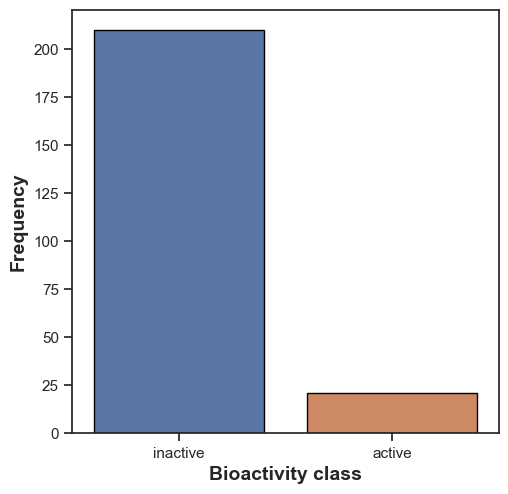

In [13]:
# display frequency plot
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='bioactivity_class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

### 3.2 Scatter Plot MW vs logP

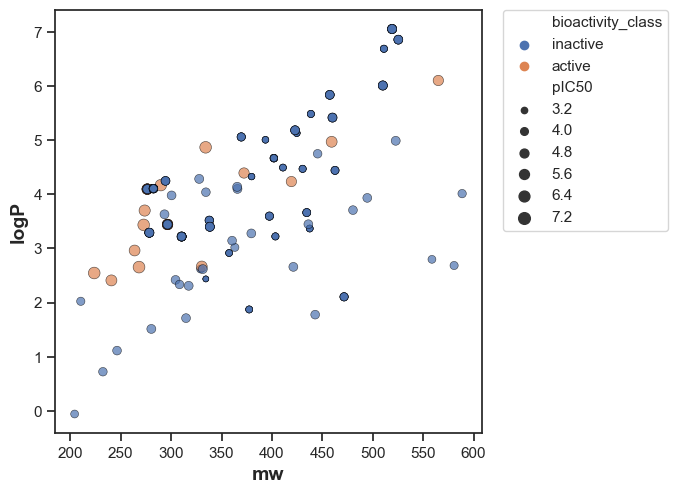

In [14]:
# display scatter plot
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='mw', y='logP', data=df_2class, hue='bioactivity_class', size='pIC50', edgecolor='black', alpha=0.7)

plt.xlabel('mw', fontsize=14, fontweight='bold')
plt.ylabel('logP', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)
plt.savefig('plot_MW_vs_LogP.pdf')

### 3.3 Box Plots

#### 3.3.1 pIC50 values

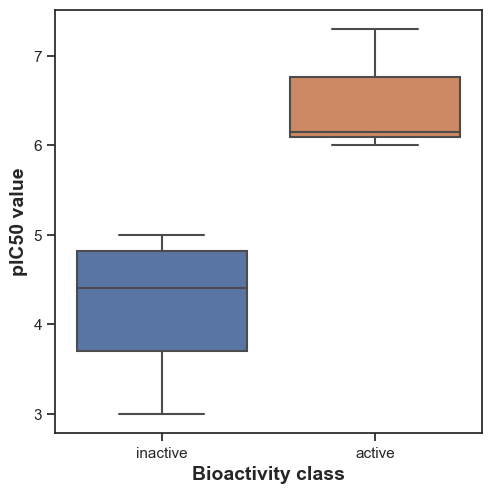

In [19]:
# display boxplot pIC50
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_pIC50.pdf')

**Statistical analysis | Mann-Whitney U Test**

Statistical Analysis will be perform to look up the difference between `inactive` and `active` class.

In [16]:
# define mann-whitney u test function
def mannwhitney(descriptor, df, alpha=0.05, verbose=False):
    """
    Mann-Whitney U test for descriptor distribution between active and inactive classes.

    Parameters:
    - descriptor (str): Column name to test.
    - df (pd.DataFrame): DataFrame with descriptor and bioactivity_class.
    - alpha (float): Significance level (default 0.05).
    - verbose (bool): If True, prints results.

    Returns:
    - pd.DataFrame: Test results with statistics and interpretation.
    """
    from scipy.stats import mannwhitneyu
    
    # select relevant columns
    df_selected = df[[descriptor, 'bioactivity_class']]
    
    # seperate dataset based on bioactivity class
    active = df_selected[df_selected['bioactivity_class'] == 'active'][descriptor]
    inactive = df_selected[df_selected['bioactivity_class'] == 'inactive'][descriptor]
    
    # perform Mann-Whitney U test
    stat, p = mannwhitneyu(active, inactive)
    
    # interpret the result
    if p > alpha:
        interpretation = 'Same distribution (fail to reject H0)'
    else:
        interpretation = 'Different distribution (reject H0)'
    
    # create a dataframe for the results
    results = pd.DataFrame({
        'Descriptor': [descriptor],
        'Statistics': [stat],
        'p-value': [p],
        'Alpha': [alpha],
        'Interpretation': [interpretation]
    })
    
    # save the result to csv file
    filename = f'mannwhitneyu_{descriptor}.csv'
    results.to_csv(filename, index=False)
    
    # Print detailed output if verbose is True
    if verbose:
        print(f'Mann-Whitney U Test for {descriptor}:')
        print(f'Statistics: {stat:.3f}, p-value: {p:.3f}')
        print(f'Interpretation: {interpretation}')

    return results


In [17]:
mannwhitney('pIC50', df_2class)

,Descriptor,Statistics,p-value,Alpha,Interpretation
0,pIC50,4410.0,4.297878e-14,0.05,Different distribution (reject H0)


##### 3.3.2 MV values

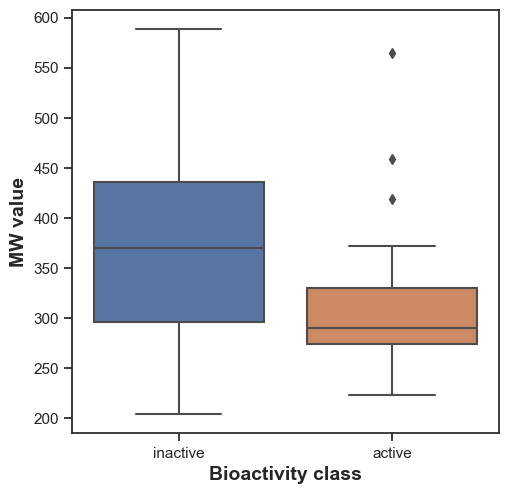

In [20]:
# display boxplot mw
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'mw', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW value', fontsize=14, fontweight='bold')

plt.savefig('plot_mw.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [21]:
mannwhitney('mw', df_2class)

,Descriptor,Statistics,p-value,Alpha,Interpretation
0,mw,1076.0,0.00011,0.05,Different distribution (reject H0)


#### 3.3.3 LogP values

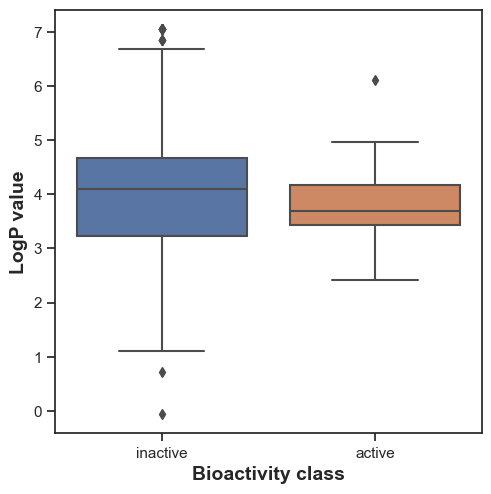

In [22]:
# display boxplot logP
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'logP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP value', fontsize=14, fontweight='bold')

plt.savefig('plot_logP.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [25]:
mannwhitney('logP', df_2class)

,Descriptor,Statistics,p-value,Alpha,Interpretation
0,logP,1943.0,0.370148,0.05,Same distribution (fail to reject H0)


##### 3.3.4 NumHDonors values

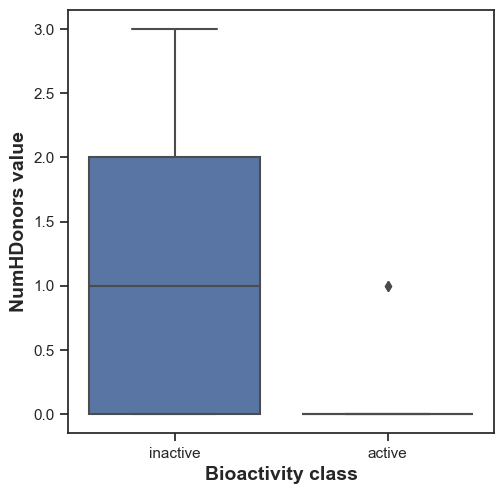

In [23]:
# display boxplot numHdonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'numHdonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors value', fontsize=14, fontweight='bold')

plt.savefig('plot_numHdonors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [26]:
mannwhitney('numHdonors', df_2class)

,Descriptor,Statistics,p-value,Alpha,Interpretation
0,numHdonors,920.0,0.000003,0.05,Different distribution (reject H0)


#### 3.3.5 NumHAcceptors values

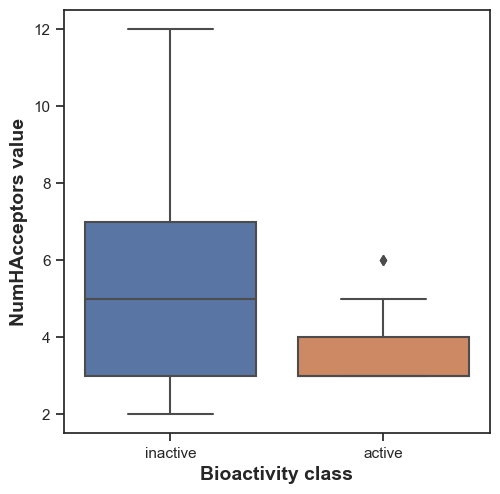

In [24]:
# display boxplot numHacceptors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'bioactivity_class', y = 'numHacceptors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHAcceptors value', fontsize=14, fontweight='bold')

plt.savefig('plot_numHacceptors.pdf')

**Statistical analysis | Mann-Whitney U Test**

In [27]:
mannwhitney('numHacceptors', df_2class)

,Descriptor,Statistics,p-value,Alpha,Interpretation
0,numHacceptors,1254.0,0.000972,0.05,Different distribution (reject H0)


### Interpretation of Box Plots and Statistical Analysis 

#### pIC50

Based on the pIC50 values, the **active** and **inactive** displayed ***statistical significant difference***, which is to be expected since the threshold values(`IC50 < 1,000 nM = Actives, while IC50 > 1,000 nM = Inactives`, corresponding to `pIC50 > 6 = Actives and pIC50 < 5 = Inactives`). were used to define actives and inactives.

#### Lipinski Descriptors

From the 4 Lipinski's descriptors (MW, LogP, NumHDonors, NumHAcceptors), only LogP exhibit ***no diference*** between the **actives** and **inactives** while the other 3 descriptos (MW, NumHDonors, and NumHAcceptors) shows ***statistical significant difference*** between **actives** and **inactives**.

### ZIP Files

In [28]:
! zip -r results.zip . -i *.csv *.pdf

  adding: mannwhitneyu_numHacceptors.csv (deflated 12%)
  adding: bioactivity_data.csv (deflated 90%)
  adding: mannwhitneyu_numHdonors.csv (deflated 11%)
  adding: mannwhitneyu_mw.csv (deflated 9%)
  adding: plot_bioactivity_class.pdf (deflated 39%)
  adding: plot_logP.pdf (deflated 36%)
  adding: bioactivity_preprocessed_data.csv (deflated 80%)
  adding: plot_mw.pdf (deflated 38%)
  adding: plot_numHdonors.pdf (deflated 38%)
  adding: plot_numHacceptors.pdf (deflated 37%)
  adding: plot_pIC50.pdf (deflated 37%)
  adding: mannwhitneyu_pIC50.csv (deflated 9%)
  adding: plot_MW_vs_LogP.pdf (deflated 16%)
  adding: mannwhitneyu_logP.csv (deflated 7%)
